In [1]:
# Name: Arooba Hanif
# Roll Number: Ezi-ML-B1-227
# Shift Time: Remote
# Internship Type: Hybird/Remote

# TASK 08

In [2]:
#  Introduction to Neural Networks (Project 8)

# A Neural Network (NN) is a machine learning model inspired by the human brain.
# It consists of layers of interconnected nodes (called neurons) that learn to recognize patterns in data.

# Key Concepts:
# Input Layer: Takes the features (for MNIST, these are pixel values of 28×28 images).
# Hidden Layers: Intermediate layers where neurons apply transformations using activation functions (e.g., ReLU, Sigmoid).
# Output Layer: Produces predictions (for MNIST, 10 classes: digits 0–9).

# Why Use Neural Networks?
# They automatically learn useful representations from raw data.
# They are especially powerful for tasks like image recognition, speech, and natural language processing.

# Activation Functions:
# ReLU (Rectified Linear Unit): Faster learning, avoids vanishing gradient, widely used in deep learning.
# Sigmoid: Maps values between 0 and 1, useful for probabilities but can slow down training.

# In This Project:
# We will train two simple neural networks on the MNIST dataset:
#   Model A (ReLU activation)
#   Model B (Sigmoid activation)
# Then we will compare their performance using accuracy, loss, and training curves.


In [3]:
# Setup & Imports (with Reproducibility)
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Verify TF version
print("TensorFlow:", tf.__version__)


TensorFlow: 2.19.0


In [4]:
# ==== Load MNIST ====
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape,  y_test.shape)

# ==== Normalize ====
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# ==== Flatten (28x28 -> 784) ====
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat  = x_test.reshape((x_test.shape[0],  -1))
print("Flattened shapes:", x_train_flat.shape, x_test_flat.shape)

# ==== One-hot labels ====
num_classes = 10
y_train_oh = to_categorical(y_train, num_classes)
y_test_oh  = to_categorical(y_test,  num_classes)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: (60000, 28, 28) (60000,)
Test : (10000, 28, 28) (10000,)
Flattened shapes: (60000, 784) (10000, 784)


In [5]:
# Model Builder (ReLU vs Sigmoid)
def build_ffn(activation="relu", input_dim=784, num_classes=10):
    # sensible initializer per activation
    if activation.lower() == "relu":
        kernel_init = tf.keras.initializers.HeNormal(seed=SEED)
    else:
        kernel_init = tf.keras.initializers.GlorotUniform(seed=SEED)

    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(256, activation=activation, kernel_initializer=kernel_init),
        layers.Dropout(0.2),
        layers.Dense(128, activation=activation, kernel_initializer=kernel_init),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax")
    ])
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

relu_model = build_ffn(activation="relu")
sigm_model = build_ffn(activation="sigmoid")

relu_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train Both Models (with EarlyStopping)
EPOCHS = 15
BATCH_SIZE = 128

earlystop = EarlyStopping(
    monitor="val_accuracy", patience=3, restore_best_weights=True
)

# Train ReLU model
history_relu = relu_model.fit(
    x_train_flat, y_train_oh,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[earlystop],
    verbose=1
)

# Train Sigmoid model
history_sigm = sigm_model.fit(
    x_train_flat, y_train_oh,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[earlystop],
    verbose=1
)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8103 - loss: 0.6210 - val_accuracy: 0.9678 - val_loss: 0.1117
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9501 - loss: 0.1654 - val_accuracy: 0.9747 - val_loss: 0.0872
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9660 - loss: 0.1121 - val_accuracy: 0.9773 - val_loss: 0.0775
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9722 - loss: 0.0887 - val_accuracy: 0.9778 - val_loss: 0.0741
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9776 - loss: 0.0722 - val_accuracy: 0.9777 - val_loss: 0.0732
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9795 - loss: 0.0635 - val_accuracy: 0.9790 - val_loss: 0.0708
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9832 - loss: 0.0525 - val_accuracy: 0.9798 - val_loss: 0.0670
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9846 - loss: 0.0479 - val_accuracy:

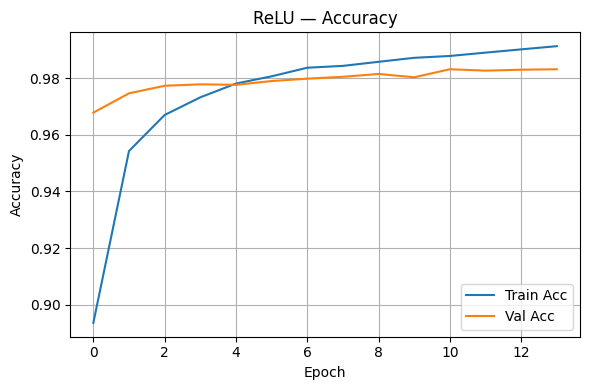

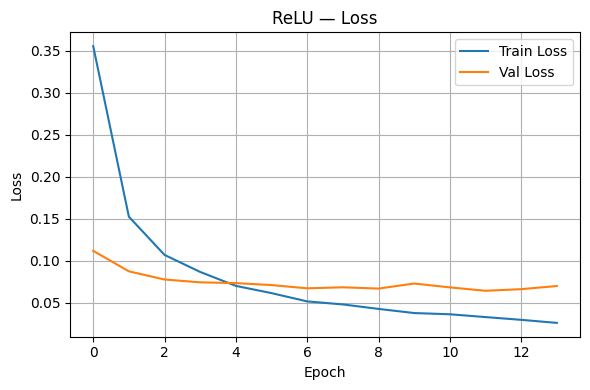

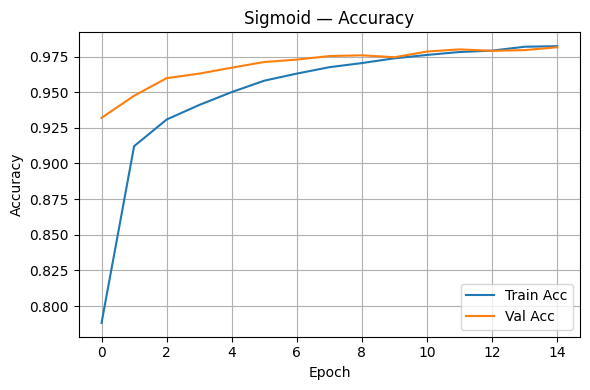

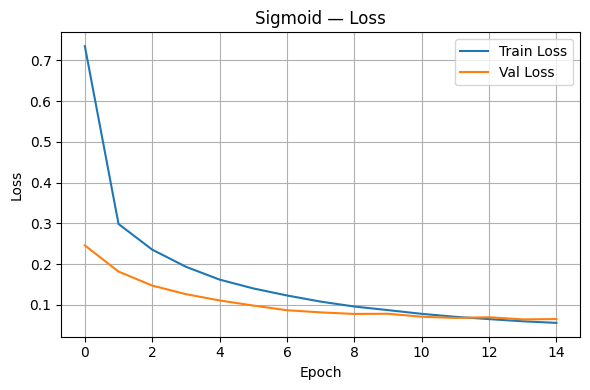

In [7]:
# Helper Plotter (Accuracy & Loss Curves)
def plot_history(history, title_prefix="Model"):
    # Accuracy
    plt.figure(figsize=(6,4))
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy')
    plt.title(f'{title_prefix} — Accuracy')
    plt.legend(); plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Loss
    plt.figure(figsize=(6,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.title(f'{title_prefix} — Loss')
    plt.legend(); plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_history(history_relu, "ReLU")
plot_history(history_sigm, "Sigmoid")


In [8]:
# Test Evaluation (Final Scores)
relu_test_loss, relu_test_acc = relu_model.evaluate(x_test_flat, y_test_oh, verbose=0)
sigm_test_loss, sigm_test_acc = sigm_model.evaluate(x_test_flat, y_test_oh, verbose=0)

print(f"ReLU  — Test Accuracy: {relu_test_acc:.4f}, Test Loss: {relu_test_loss:.4f}")
print(f"Sigmoid — Test Accuracy: {sigm_test_acc:.4f}, Test Loss: {sigm_test_loss:.4f}")


ReLU  — Test Accuracy: 0.9808, Test Loss: 0.0657
Sigmoid — Test Accuracy: 0.9796, Test Loss: 0.0695


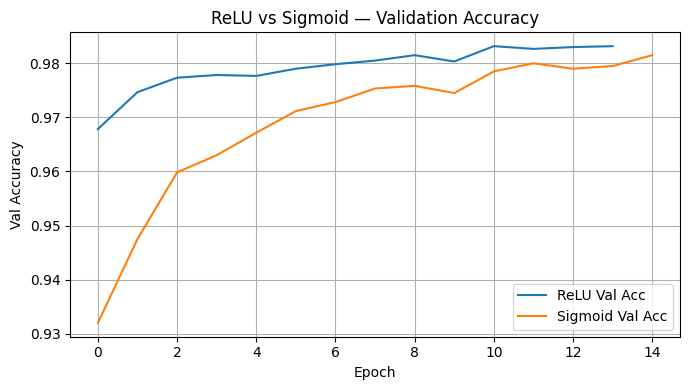

In [9]:
# Side-by-Side Comparison Plot (Val Accuracy)
# Compare validation accuracy curves directly
plt.figure(figsize=(7,4))
plt.plot(history_relu.history['val_accuracy'], label='ReLU Val Acc')
plt.plot(history_sigm.history['val_accuracy'], label='Sigmoid Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Val Accuracy')
plt.title('ReLU vs Sigmoid — Validation Accuracy')
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()


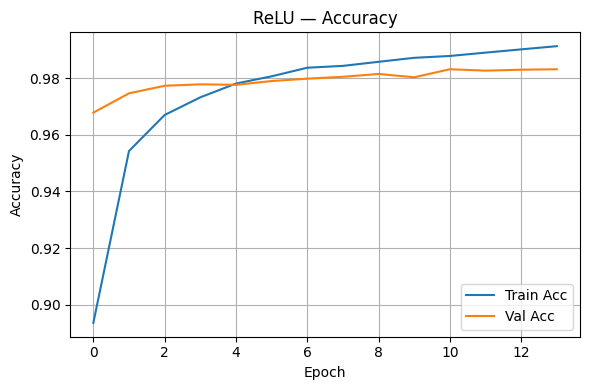

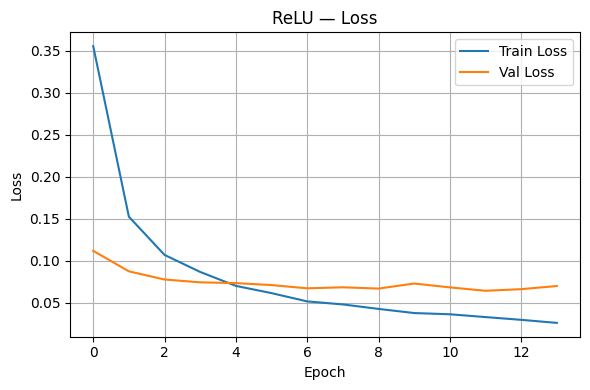

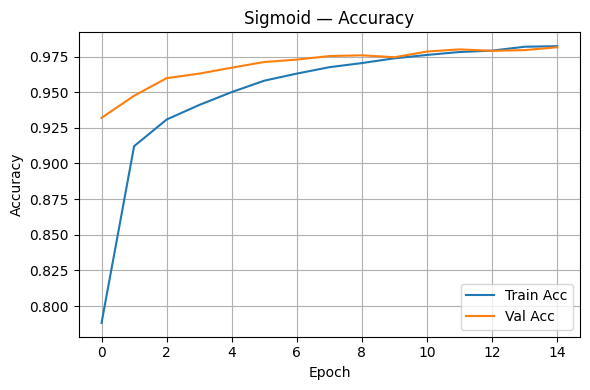

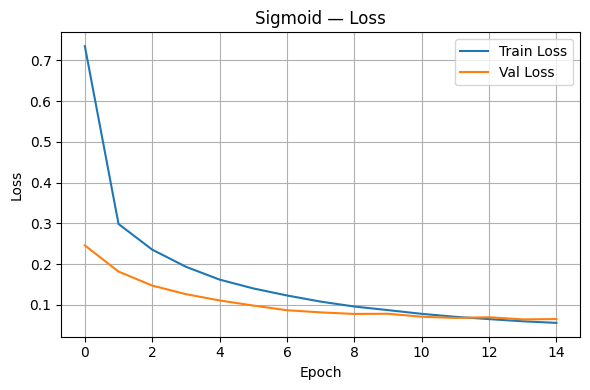

Saved: models (.h5) and accuracy/loss plots (.png)


In [10]:
# Save Plots & Models
# Save models
relu_model.save("mnist_relu_model.h5")
sigm_model.save("mnist_sigmoid_model.h5")

# Re-plot and save summary curves
def save_history_plots(history, prefix):
    # Acc
    plt.figure(figsize=(6,4))
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy')
    plt.title(f'{prefix} — Accuracy')
    plt.legend(); plt.grid(True); plt.tight_layout()
    plt.savefig(f"{prefix.lower().replace(' ','_')}_accuracy.png", dpi=200)
    plt.show()

    # Loss
    plt.figure(figsize=(6,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.title(f'{prefix} — Loss')
    plt.legend(); plt.grid(True); plt.tight_layout()
    plt.savefig(f"{prefix.lower().replace(' ','_')}_loss.png", dpi=200)
    plt.show()

save_history_plots(history_relu, "ReLU")
save_history_plots(history_sigm, "Sigmoid")

print("Saved: models (.h5) and accuracy/loss plots (.png)")
